<a href="https://colab.research.google.com/github/Ayesha-Rimione/Predicting-Test-Match-Winners/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My First ML Project

# Datset Load

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Adding the dataset directly from Kaggle API.

In [6]:
!pip install kaggle

In [8]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [9]:
! mkdir ~/.kaggle

In [10]:
! cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

Downloading the dataset

In [12]:
! kaggle datasets download qammarshahzad/cricket-match-dataset-test-nations-18772025

Dataset URL: https://www.kaggle.com/datasets/qammarshahzad/cricket-match-dataset-test-nations-18772025
License(s): CC0-1.0


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("qammarshahzad/cricket-match-dataset-test-nations-18772025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cricket-match-dataset-test-nations-18772025


In [14]:
!unzip  cricket-match-dataset-test-nations-18772025.zip

Archive:  cricket-match-dataset-test-nations-18772025.zip
  inflating: Cricket-all-teams-all-matches.csv  


Loading the Data

In [15]:
df = pd.read_csv('Cricket-all-teams-all-matches.csv')
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test


Now formatting the data

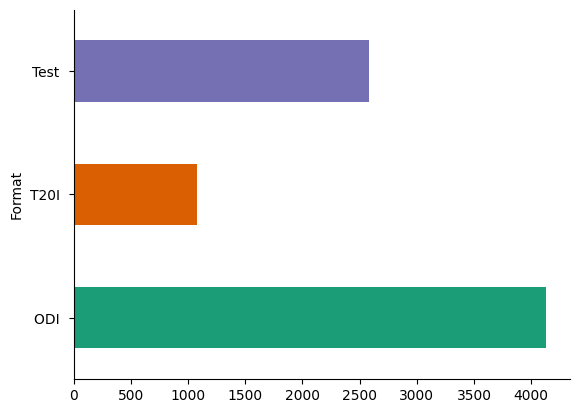

In [16]:
# @title Format

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Format').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
df.info()
df.describe()
df.isnull().sum()
df.columns
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      7793 non-null   object
 1   Team 2      7793 non-null   object
 2   Winner      7793 non-null   object
 3   Margin      6755 non-null   object
 4   Ground      7793 non-null   object
 5   Match Date  7793 non-null   object
 6   Scorecard   7793 non-null   object
 7   Format      7793 non-null   object
dtypes: object(8)
memory usage: 487.2+ KB


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test


Analysing the results of each team through a box plot.

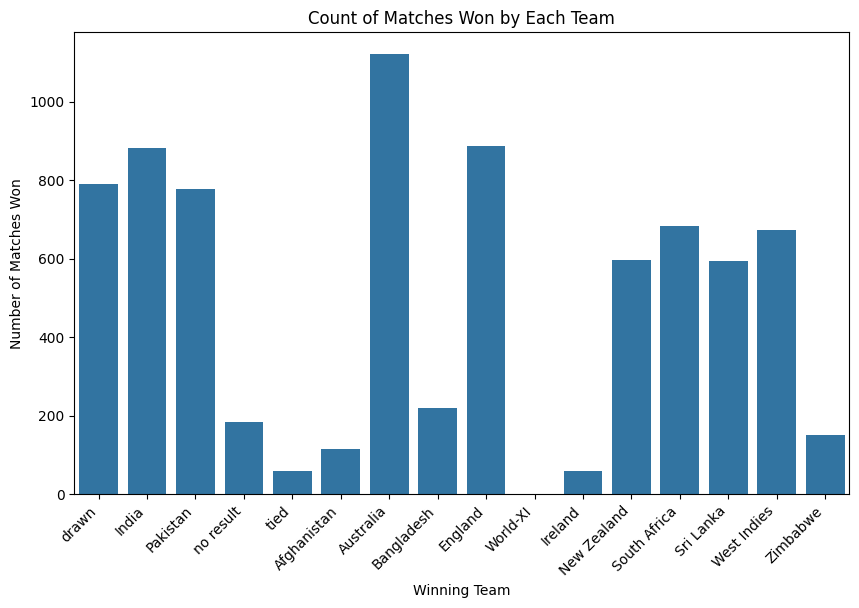

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Winner', data=df)
plt.title('Count of Matches Won by Each Team')
plt.xlabel('Winning Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:
import numpy as np

df['Loser'] = np.where(df['Winner'] == df['Team 1'], df['Team 2'],
                       np.where(df['Winner'] == df['Team 2'], df['Team 1'], 'drawn'))


In [20]:
df.columns
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Loser
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test,drawn
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test,drawn
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,Pakistan
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,India
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test,drawn


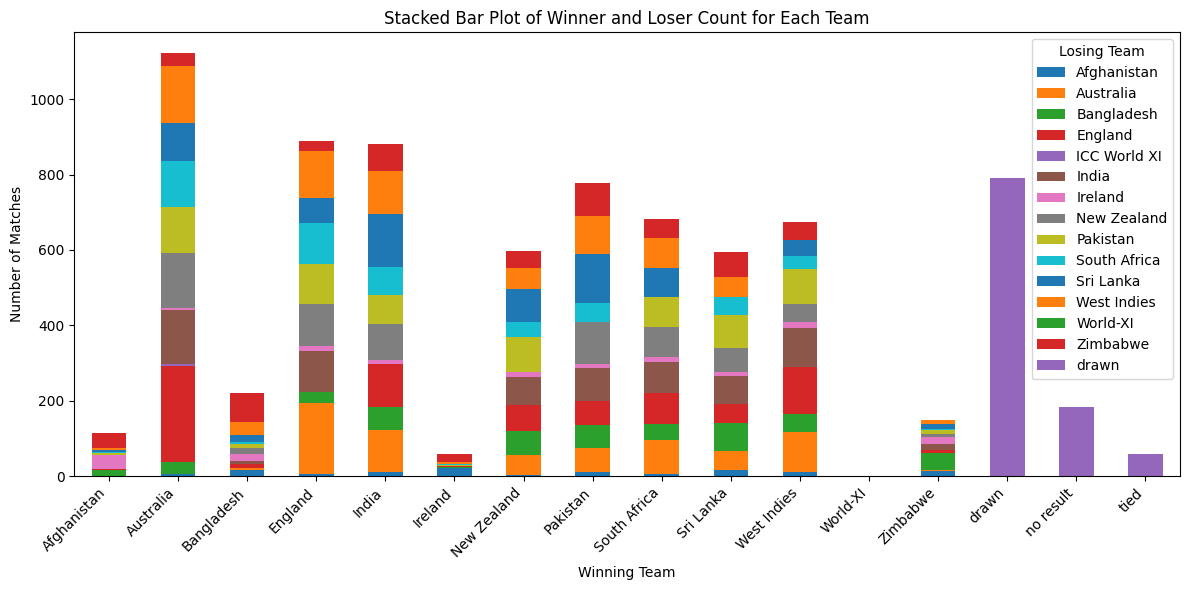

In [21]:
# prompt: now make a stacked bar plot for the winner and loser count of each team

import matplotlib.pyplot as plt
winner_loser_counts = df.groupby('Winner')['Loser'].value_counts().unstack(fill_value=0)

winner_loser_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Winner and Loser Count for Each Team')
plt.xlabel('Winning Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Losing Team')
plt.tight_layout()
plt.show()


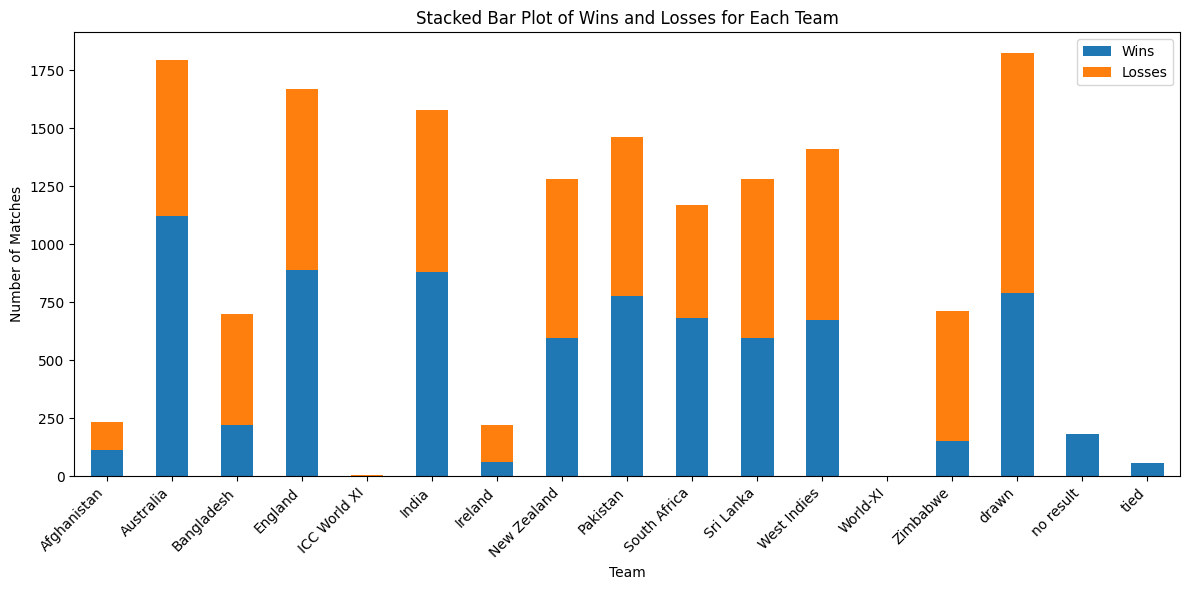

In [22]:
# prompt: make a stacked bar plot of each team with the number of matches wining and losing total number. no need to give the country they lost or win against

import pandas as pd
import matplotlib.pyplot as plt
team_wins = df['Winner'].value_counts()
team_losses = df['Loser'].value_counts()

# Combine wins and losses for each team
team_stats = pd.DataFrame({'Wins': team_wins, 'Losses': team_losses})
team_stats = team_stats.fillna(0) #fill NaN with 0


team_stats.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Wins and Losses for Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Preproccesing**

In [24]:
# prompt: find the null values and the percentage of it

import pandas as pd
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Print the number of null values and the percentage for each column
print("Null Values and Percentage:")
print(pd.concat([df.isnull().sum(), null_percentage], axis=1, keys=['Null Count', 'Percentage']))


Null Values and Percentage:
            Null Count  Percentage
Team 1               0    0.000000
Team 2               0    0.000000
Winner               0    0.000000
Margin            1038   13.319646
Ground               0    0.000000
Match Date           0    0.000000
Scorecard            0    0.000000
Format               0    0.000000
Loser                0    0.000000


# Margin spilting

In [27]:
# Extract number and type from 'Margin'
df[['Margin_Value', 'Margin_Type']] = df['Margin'].str.extract(r'(\d+)\s+(\w+)')
df['Margin_Value'] = pd.to_numeric(df['Margin_Value'], errors='coerce')
# Initialize with NaN
df['Runs_Win_Margin'] = np.where(df['Margin_Type'] == 'runs', df['Margin_Value'], np.nan)
df['Wickets_Win_Margin'] = np.where(df['Margin_Type'] == 'wickets', df['Margin_Value'], np.nan)
print("Nulls in Margin_Value:", df['Margin_Value'].isnull().sum())
print("Nulls in Runs_Win_Margin:", df['Runs_Win_Margin'].isnull().sum())
print("Nulls in Wickets_Win_Margin:", df['Wickets_Win_Margin'].isnull().sum())
df.head()

Nulls in Margin_Value: 1038
Nulls in Runs_Win_Margin: 4241
Nulls in Wickets_Win_Margin: 4718


Filling with 0 in margin where matches were drawen.

In [35]:
# Fill 0 in Margin-related columns where Winner is 'drawn'
df.loc[df['Winner'].str.lower() == 'drawn', ['Margin_Value', 'Runs_Win_Margin', 'Wickets_Win_Margin','Margin']] = 0
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Loser,Runs_Win_Margin,Wickets_Win_Margin,Margin_Value
0,India,Pakistan,drawn,0,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test,drawn,0.0,0.0,0.0
1,India,Pakistan,drawn,0,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test,drawn,0.0,0.0,0.0
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,Pakistan,0.0,6.0,NaN
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,India,341.0,0.0,NaN
4,Pakistan,India,drawn,0,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test,drawn,0.0,0.0,0.0


In [31]:
# prompt: Now again show the null values with percentages

import pandas as pd
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Print the number of null values and the percentage for each column
print("Null Values and Percentage:")
print(pd.concat([df.isnull().sum(), null_percentage], axis=1, keys=['Null Count', 'Percentage']))


Null Values and Percentage:
                    Null Count  Percentage
Team 1                       0    0.000000
Team 2                       0    0.000000
Winner                       0    0.000000
Margin                    1038   13.319646
Ground                       0    0.000000
Match Date                   0    0.000000
Scorecard                    0    0.000000
Format                       0    0.000000
Loser                        0    0.000000
Margin_Value               247    3.169511
Margin_Type               1038   13.319646
Runs_Win_Margin           3450   44.270499
Wickets_Win_Margin        3927   50.391377


Why are missing values higher in Runs_Win_Margin and Wickets_Win_Margin?
Because every match has only one type of win:

A team either wins by runs → Wickets_Win_Margin is NaN

Or wins by wickets → Runs_Win_Margin is NaN

So it's expected that ~50% of both will be null (only one is valid per match). That’s not an error — it reflects match logic.

In [44]:
df['Runs_Win_Margin'] = df['Runs_Win_Margin'].fillna(0)
df['Wickets_Win_Margin'] = df['Wickets_Win_Margin'].fillna(0)
null_percentage = (df.isnull().sum() / len(df)) * 100

# Print the number of null values and the percentage for each column
print("Null Values and Percentage:")
print(pd.concat([df.isnull().sum(), null_percentage], axis=1, keys=['Null Count', 'Percentage']))


Null Values and Percentage:
                    Null Count  Percentage
Team 1                       0    0.000000
Team 2                       0    0.000000
Winner                       0    0.000000
Margin                     247    3.169511
Ground                       0    0.000000
Match Date                   0    0.000000
Scorecard                    0    0.000000
Format                       0    0.000000
Loser                        0    0.000000
Runs_Win_Margin              0    0.000000
Wickets_Win_Margin           0    0.000000


Dropping rop Margin_Type and Margin_Value, because they are now redundant (information preserved in split columns).

In [42]:
df.drop(['Margin_Value'], axis=1, inplace=True)
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Loser,Runs_Win_Margin,Wickets_Win_Margin
0,India,Pakistan,drawn,0,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test,drawn,0.0,0.0
1,India,Pakistan,drawn,0,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test,drawn,0.0,0.0
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,Pakistan,0.0,6.0
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,India,341.0,0.0
4,Pakistan,India,drawn,0,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test,drawn,0.0,0.0


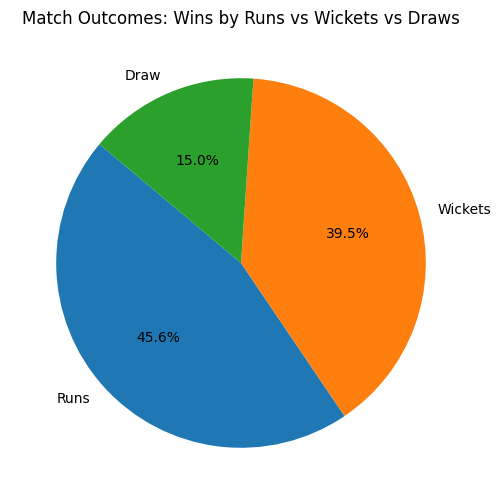

In [46]:
# Create a new column for win type
df['Win_Method'] = df.apply(
    lambda row: 'Runs' if row['Runs_Win_Margin'] > 0 else ('Wickets' if row['Wickets_Win_Margin'] > 0 else 'Draw'),
    axis=1
)

# Count win method occurrences
win_methods = df['Win_Method'].value_counts()

# Plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(win_methods, labels=win_methods.index, autopct='%1.1f%%', startangle=140)
plt.title('Match Outcomes: Wins by Runs vs Wickets vs Draws')
plt.show()


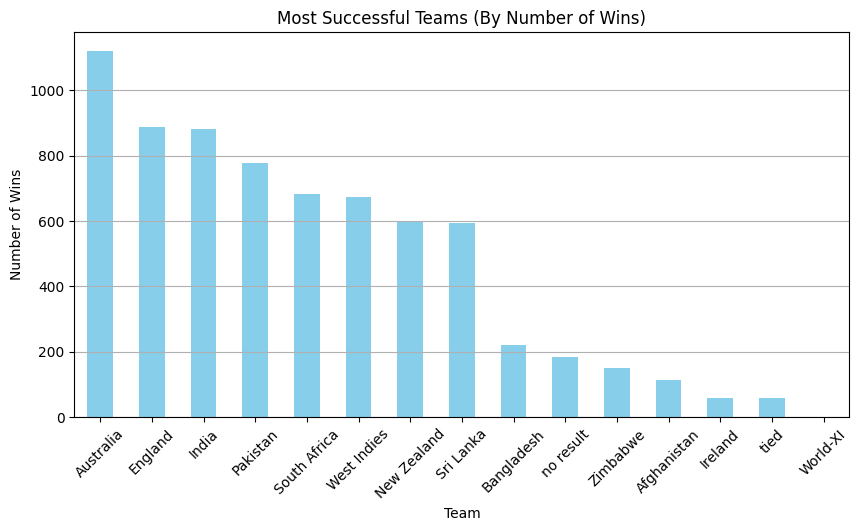

In [47]:
# Count how many times each team appears as Winner (excluding "drawn")
team_wins = df[df['Winner'].str.lower() != 'drawn']['Winner'].value_counts()

# Bar plot
team_wins.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Most Successful Teams (By Number of Wins)')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


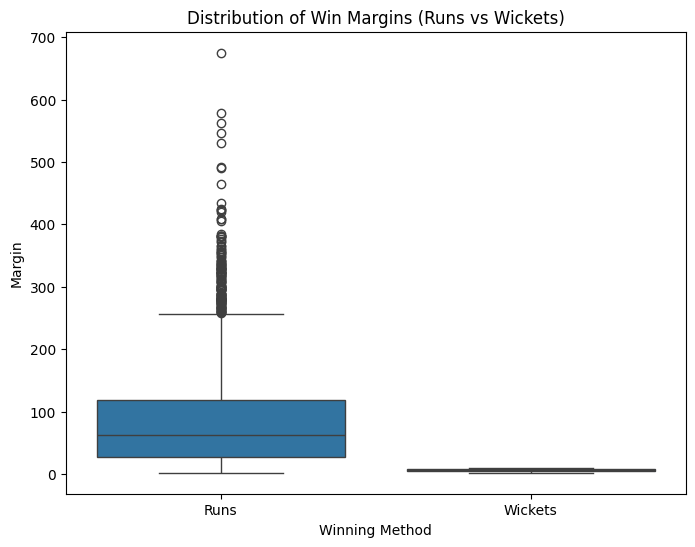

In [48]:
import seaborn as sns

# Prepare data for boxplot
margin_data = df[df['Win_Method'] != 'Draw'][['Win_Method', 'Runs_Win_Margin', 'Wickets_Win_Margin']]
margin_data = margin_data.melt(id_vars='Win_Method', value_vars=['Runs_Win_Margin', 'Wickets_Win_Margin'])

# Only keep non-zero values
margin_data = margin_data[margin_data['value'] > 0]

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Win_Method', y='value', data=margin_data)
plt.title('Distribution of Win Margins (Runs vs Wickets)')
plt.ylabel('Margin')
plt.xlabel('Winning Method')
plt.show()


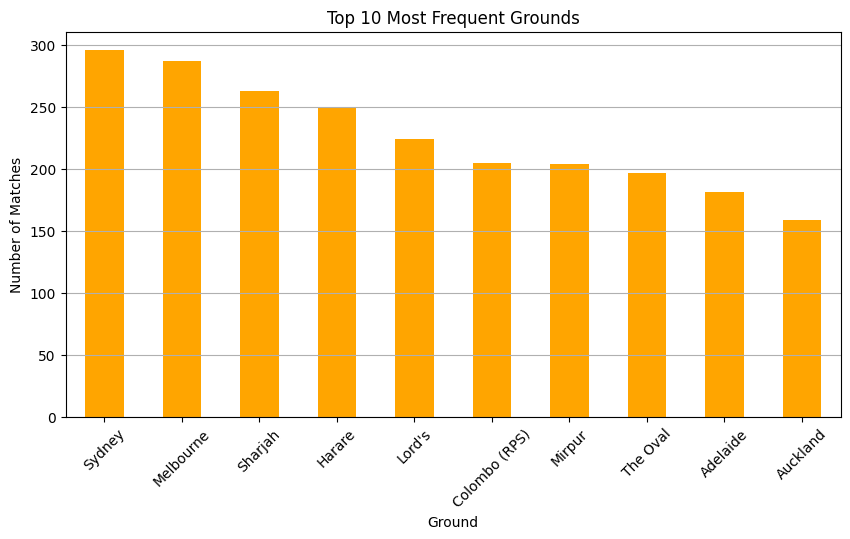

In [49]:
top_grounds = df['Ground'].value_counts().head(10)

top_grounds.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Top 10 Most Frequent Grounds')
plt.xlabel('Ground')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


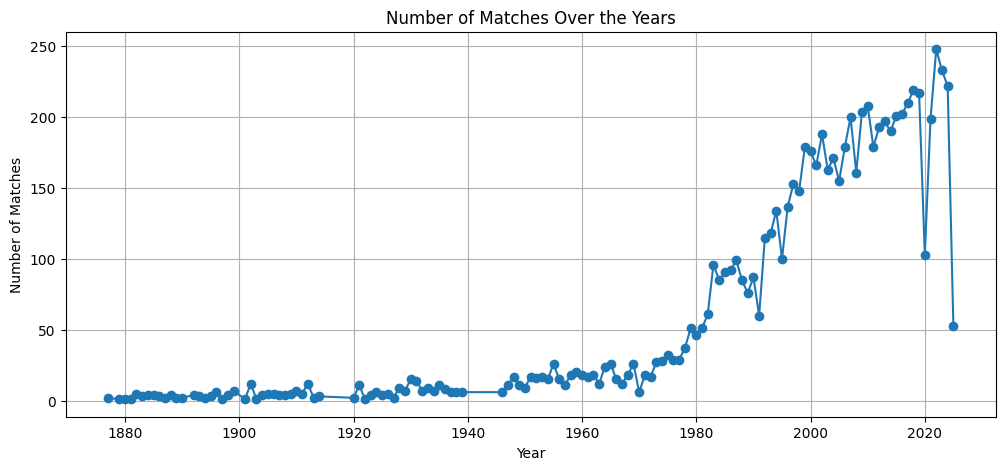

In [50]:
# Convert Match Date to year
df['Year'] = pd.to_datetime(df['Match Date'].str.extract(r'(\d{4})')[0]).dt.year

matches_per_year = df['Year'].value_counts().sort_index()

matches_per_year.plot(kind='line', marker='o', figsize=(12,5))
plt.title('Number of Matches Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()
